In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom
import numpy as np
from sklearn.metrics import silhouette_score

In [21]:
df_enc_scaled = pd.read_csv('df_enc_scaled.csv')

In [22]:
data = df_enc_scaled.values

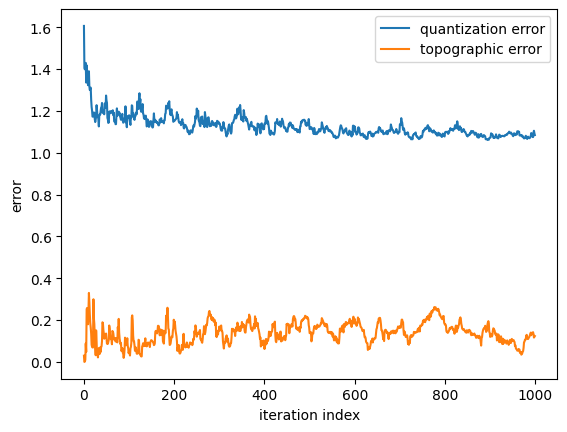

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.0844713402540271


In [23]:
from minisom import MiniSom
import matplotlib.pyplot as plt

som_shape = (4, 1)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=0.5, learning_rate=.5,
              neighborhood_function='gaussian',random_seed=33)
max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('error')
plt.xlabel('iteration index')
plt.legend()
plt.show()

som.train(data, 1000, verbose=True)

In [24]:
som.topographic_error(data[:100])

0.17

In [25]:
winner_coordinates = np.array([som.winner(x) for x in data]).T
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
y = cluster_index
X = sample
score = silhouette_score(X, y, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.160
